# Personal Key Indicators of Heart Disease

In this project, we are going to use 2020 annual CDC survey data of 400k adults related to their health status. You can find the dataset on Kaggle, [here](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). 

####  1. Extract, Transform, Load
- Import relevant libraries
- Load the data
- Explore the data

In [1]:
#  Import relevant libraries and packages. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.options.display.max_columns=10000 

In [2]:
# load the data
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
# Checking its appearance
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Using .info() to get a good overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Dimension of the dataset
df.shape

(319795, 18)

In [6]:
# Pandas's df.describe() function returns an analysis of each numeric feature.
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

#### 2. Exploratory Data Analysis


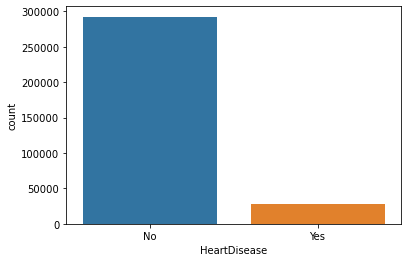

In [8]:
# Lets see how many have heart disease and how many hvae not.
sns.countplot(x = 'HeartDisease', data=df)
plt.show()

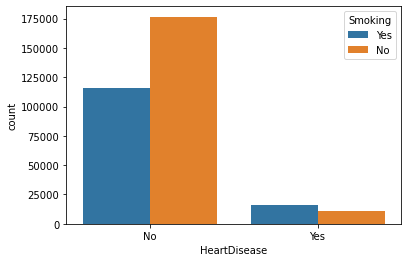

In [9]:
# Showing heart disease rate per smoking
sns.countplot(x='HeartDisease', data=df, hue='Smoking')
plt.show()

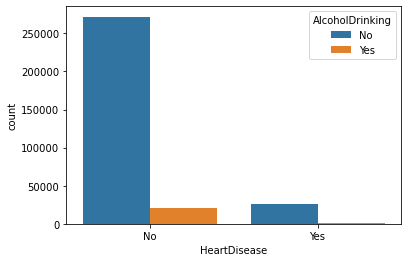

In [10]:
sns.countplot(x='HeartDisease', data=df, hue='AlcoholDrinking')
plt.show()

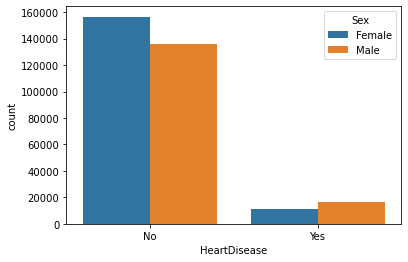

In [11]:
sns.countplot(x='HeartDisease', data=df, hue='Sex')
plt.show()

#### 3. Modeling

In [12]:
# pd.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
df = pd.get_dummies(df) 
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0


In [13]:
df['HeartDisease'] = df['HeartDisease_Yes']

In [14]:
df = df.drop(['HeartDisease_No', 'HeartDisease_Yes'], axis=1)
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0


In [15]:
# Calculating the percent of the dependent variable. 
count_no_dis = len(df[df['HeartDisease']==0])
count_dis = len(df[df['HeartDisease']==1])
pct_of_no_dis = count_no_dis /(count_dis + count_no_dis) 
print('Percent of no heart disease: ', pct_of_no_dis*100)
pct_of_dis = count_dis / (count_dis + count_no_dis)
print('Percent of heart disease: ', pct_of_dis*100)

Percent of no heart disease:  91.44045404086994
Percent of heart disease:  8.559545959130068


Our Classes are imbalanced, and the ratio of no-heart_disease to heart_disease is 91:9. 


In [16]:
# class count
class_count_0, class_count_1 = df['HeartDisease'].value_counts()
# seperate class
class_0 = df[df['HeartDisease'] == 0]
class_1 = df[df['HeartDisease'] == 1]
print('class 0: ', class_0.shape)
print('class 1: ', class_1.shape)

class 0:  (292422, 51)
class 1:  (27373, 51)


In [17]:
# duplicating the minority class. 
class_1_over = class_1.sample(class_count_0, replace = True)

df = pd.concat([class_1_over, class_0], axis=0)
print(df['HeartDisease'].value_counts())

1    292422
0    292422
Name: HeartDisease, dtype: int64


In [18]:
df.shape

(584844, 51)

#### 3. Modeling

In [19]:
# Subsetting our data into our dependent and independent variables.
X = df.loc[:,:'SkinCancer_Yes']
y = df.loc[:,'HeartDisease']

In [20]:
# Split the data. This line uses the sklearn fucntion train_test_split().
# The test_size parameter means we can train. with 75% of the data, and test on 25% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [21]:
# We want to check the shape of the X_train, y_train, X_test and y_test to make sure the proportions are right.
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (438633, 50)
y_train:  (438633,)
X_test:  (146211, 50)
y_test:  (146211,)


In [22]:
# Create the model: we are using LogisticRegresssion function from sklearn.linear_model 
# default parameters: solver: 'lbfgs', penalty: 'l2'
model_1 = LogisticRegression(max_iter=1000)
model_1.max_iter

1000

In [23]:
# we are making our algorithm learn the relationship  between train dataset. 
model_1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Score method evaluates accuracy
model_1.score(X_test, y_test)

0.764326897429058

In [25]:
# prediction on X_test data
y_test_pred1 = model_1.predict(X_test)
y_test_pred1

array([1, 0, 1, ..., 0, 1, 1], dtype=uint8)

In [26]:
# 2nd model with penalty = l1 and solver = saga
model_2 = LogisticRegression(max_iter=1000, penalty = 'l1', solver='saga')
model_2.fit(X_train, y_train)
y_test_pred2 = model_2.predict(X_test)

In [27]:
# 3rd model with penalty = l2 and solver = 'newton-cg'
model_3 = LogisticRegression(max_iter=1000, penalty = 'l2', solver='newton-cg')
model_3.fit(X_train, y_train)
y_test_pred3 = model_3.predict(X_test)

In [28]:
# Patients who have heart disease
true_positive=((y_test_pred1 == y_test) & (y_test_pred1 == 1)).sum()
true_positive

57201

In [29]:
# Patients who do not have heart disease 
true_negative = ((y_test_pred1 == y_test) & (y_test_pred1 == 0)).sum()
true_negative

54552

In [30]:
# Patients who have heart disease, but the algorithm says they do not
false_negative = ((y_test_pred1 != y_test) & (y_test_pred1 == 0)).sum()
false_negative

15817

In [31]:
# Patients who do not have heart disease, but the algorithm says they have it
false_positive =((y_test_pred1 != y_test) & (y_test_pred1 == 1)).sum()
false_positive

18641

In [32]:
# Defining a function that gives the confusion matrix
def confusion_matrix(y_t_pred,y_t_true):
    t_p = ((y_t_pred == y_t_true) & (y_t_pred == 1)).sum()
    t_n = ((y_t_pred == y_t_true) & (y_t_pred == 0)).sum()
    f_n = ((y_t_pred != y_t_true) & (y_t_pred == 0)).sum()
    f_p = ((y_t_pred != y_t_true) & (y_t_pred == 1)).sum()
    p = t_p / (t_p + f_p)
    r = t_p / (t_p + f_n)
    F1_score = 2*(p*r) / (p + r)
    a = (t_p + t_n) / (t_p + t_n + f_p + f_n)
    result = {'true positive' : t_p, 'true negative' : t_n, 'false positive' : f_p,
              'false negative' : f_n, 'accuracy' : a,'precision': p, 'recall' : r, 'F1 score' : F1_score}
    return result

In [33]:
hyperparameter_table = []
def heart_disease_model(model, confusion_m):
    
    
    hyper_parameters = {}

    hyper_parameters['model'] = str(type(model))
    hyper_parameters['model.max_iter'] = model.max_iter
    hyper_parameters['penalty'] = model.penalty
    hyper_parameters['solver'] = model.solver
    hyper_parameters.update(confusion_m)
    hyperparameter_table.append(hyper_parameters)
    return pd.DataFrame(hyperparameter_table)


In [34]:
heart_disease_model(model_1, confusion_matrix(y_test_pred1, y_test))

,model,model.max_iter,penalty,solver,true positive,true negative,false positive,false negative,accuracy,precision,recall,F1 score
0,<class 'sklearn.linear_model._logistic.Logisti...,1000,l2,lbfgs,57201,54552,18641,15817,0.764327,0.754213,0.783382,0.768521


In [35]:
 heart_disease_model(model_2, confusion_matrix(y_test_pred2, y_test))

,model,model.max_iter,penalty,solver,true positive,true negative,false positive,false negative,accuracy,precision,recall,F1 score
0,<class 'sklearn.linear_model._logistic.Logisti...,1000,l2,lbfgs,57201,54552,18641,15817,0.764327,0.754213,0.783382,0.768521
1,<class 'sklearn.linear_model._logistic.Logisti...,1000,l1,saga,57191,54555,18638,15827,0.764279,0.754210,0.783245,0.768454


In [36]:
results = heart_disease_model(model_3, confusion_matrix(y_test_pred3,y_test))

In [37]:
results

,model,model.max_iter,penalty,solver,true positive,true negative,false positive,false negative,accuracy,precision,recall,F1 score
0,<class 'sklearn.linear_model._logistic.Logisti...,1000,l2,lbfgs,57201,54552,18641,15817,0.764327,0.754213,0.783382,0.768521
1,<class 'sklearn.linear_model._logistic.Logisti...,1000,l1,saga,57191,54555,18638,15827,0.764279,0.754210,0.783245,0.768454
2,<class 'sklearn.linear_model._logistic.Logisti...,1000,l2,newton-cg,57191,54555,18638,15827,0.764279,0.754210,0.783245,0.768454


In [38]:
results.to_csv('HeartDisease_results')

In [39]:
model_2.coef_

array([[ 1.00503419e-02,  6.07785598e-03,  7.28732479e-03,
        -2.56113497e-02, -1.67383591e-01,  2.13539738e-01,
         1.34473098e-01, -8.83147368e-02, -6.00058599e-01,
         6.46214727e-01, -1.00136485e-01,  1.46292615e-01,
        -3.51433724e-01,  3.97589861e-01, -1.53759301e+00,
        -1.45348757e+00, -1.05642774e+00, -1.05241811e+00,
        -6.78936129e-01, -3.85816266e-01,  5.98538624e-02,
         3.23469004e-01,  6.07645183e-01,  8.73346284e-01,
         1.18727328e+00,  1.42271202e+00,  1.72531913e+00,
         1.58186033e-01, -2.79874530e-01, -8.96734204e-02,
         0.00000000e+00,  1.47466326e-01,  8.81918517e-02,
        -1.75896429e-01, -2.83335032e-02,  3.22812151e-01,
        -4.69466140e-02, -2.07317985e-09,  1.97709386e-02,
        -9.89596116e-01,  5.63342236e-01,  6.64408452e-02,
         9.03325562e-01, -5.10682530e-01, -1.41347560e-01,
         1.87503692e-01, -2.79735917e-01,  3.25892111e-01,
        -4.36210412e-02,  8.97771752e-02]])

In [40]:
model_2.feature_names_in_

array(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_No',
       'Smoking_Yes', 'AlcoholDrinking_No', 'AlcoholDrinking_Yes',
       'Stroke_No', 'Stroke_Yes', 'DiffWalking_No', 'DiffWalking_Yes',
       'Sex_Female', 'Sex_Male', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good',
       'Asthma_No', 'Asthma_Yes', 'KidneyDis

In [41]:
# logistic regression uses the logit link function to bend our line of best fit and 
# convert our classification problem into a regression problem
odds = np.exp(model_2.coef_[0]) # converting log odds to regular odds
pd.DataFrame(odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
AgeCategory_80 or older,5.614312
AgeCategory_75-79,4.148356
AgeCategory_70-74,3.278130
GenHealth_Poor,2.467796
AgeCategory_65-69,2.394912
Stroke_Yes,1.908304
AgeCategory_60-64,1.836103
GenHealth_Fair,1.756533
Sex_Male,1.488234
KidneyDisease_Yes,1.385266
